<a href="https://colab.research.google.com/github/williamdavidona/Time-Series-Models/blob/main/CO2_emission_World_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#World Optimization

Name: William Ona

#Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [135]:
data = pd.read_csv('co2_file.csv')
data.head()

,Unnamed: 0,year,country,value,GDP per capita,Renewables_energy_share,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh),Renewables (% electricity),GDP
0,0,1985,Argentina,100596.811,2926.0,12.759556,0.0,20.653124,0.0,0.0,45.853027,8.841667e+10
1,1,1986,Argentina,104212.473,3613.0,12.298526,0.0,21.030247,0.0,0.0,43.152370,1.109340e+11
2,2,1987,Argentina,114942.115,3562.0,12.247486,0.0,21.912518,0.0,0.0,42.249610,1.111060e+11
3,3,1988,Argentina,121473.042,3985.0,8.417367,0.0,15.259144,0.0,0.0,29.299515,1.262070e+11
4,4,1989,Argentina,117090.977,2383.0,7.543593,0.0,13.187393,0.0,0.0,26.135784,7.663690e+10


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  13953 non-null  int64  
 1   year                                        13953 non-null  int64  
 2   country                                     13953 non-null  object 
 3   value                                       13953 non-null  float64
 4   GDP per capita                              12075 non-null  float64
 5   Renewables_energy_share                     3629 non-null   float64
 6   Electricity from wind (TWh)                 5664 non-null   float64
 7   Electricity from hydro (TWh)                5664 non-null   float64
 8   Electricity from solar (TWh)                5664 non-null   float64
 9   Other renewables including bioenergy (TWh)  5664 non-null   float64
 10  Renewables

In [136]:
data = data.fillna(0)

In [137]:
data['country'].unique()

array(['Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Belgium',
       'Bangladesh', 'Bulgaria', 'Belarus', 'Brazil', 'Canada', 'Chile',
       'China', 'Colombia', 'Cyprus', 'Czechia', 'Germany', 'Denmark',
       'Algeria', 'Ecuador', 'Estonia', 'Finland', 'France', 'Greece',
       'Croatia', 'Aruba', 'Afghanistan', 'Angola', 'Albania', 'Armenia',
       'Antigua and Barbuda', 'Burundi', 'Benin', 'Burkina Faso',
       'Bahrain', 'Bosnia and Herzegovina', 'Belize', 'Bolivia',
       'Barbados', 'Bhutan', 'Botswana', 'Central African Republic',
       "Cote d'Ivoire", 'Cameroon', 'Comoros', 'Costa Rica', 'Cuba',
       'Cayman Islands', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Eritrea', 'Ethiopia', 'Fiji', 'Gabon', 'Georgia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Equatorial Guinea', 'Grenada',
       'Greenland', 'Guatemala', 'Guyana', 'Honduras', 'Haiti',
       'Cambodia', 'French Polynesia', 'El Salvador', 'Eswatini', 'Chad',
       'British Virgin Islands'

##Data cleaning

###Region

In [138]:
asia = data[data['country'].str.contains('Asia')]['country'].unique()
caribbean = data[data['country'].str.contains('Caribbean')]['country'].unique()
africa = data[data['country'].str.contains('Africa')]['country'].unique()
africa = africa[africa != 'South Africa']
europe = data[data['country'].str.contains('Euro')]['country'].unique()
North_America = data[data['country'].str.contains('North America')]['country'].unique()

In [139]:
caribbean

array(['Caribbean small states',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & Caribbean',
       'Latin America & the Caribbean (IDA & IBRD countries)'],
      dtype=object)

###Demographic

In [140]:
demographic = data[data['country'].str.contains('demo')]['country'].unique()
demographic

array(['Early-demographic dividend', 'Late-demographic dividend',
       'Pre-demographic dividend', 'Post-demographic dividend'],
      dtype=object)

###Income

In [142]:
income = data[data['country'].str.contains('income')]['country'].unique()
ida = data[data['country'].str.contains('IDA')]['country'].unique()
ibrd = data[data['country'].str.contains('IBRD')]['country'].unique()


In [143]:
other_regions = ['World', 'Europe', 'South Asia', 'OECD members', 'Euro area', 'Arab World', 'Heavily indebted poor countries (HIPC)','Small states','Other small states' , 'Fragile and conflict affected situations', 'Least developed countries: UN classification', 'Pacific island small states']
groups = np.concatenate((asia, europe, caribbean, africa, demographic, ida, ibrd,income, other_regions))
co2_countries= data.query("country not in @groups").copy()

In [144]:
co2_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11103 entries, 0 to 13952
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  11103 non-null  int64  
 1   year                                        11103 non-null  int64  
 2   country                                     11103 non-null  object 
 3   value                                       11103 non-null  float64
 4   GDP per capita                              11103 non-null  float64
 5   Renewables_energy_share                     11103 non-null  float64
 6   Electricity from wind (TWh)                 11103 non-null  float64
 7   Electricity from hydro (TWh)                11103 non-null  float64
 8   Electricity from solar (TWh)                11103 non-null  float64
 9   Other renewables including bioenergy (TWh)  11103 non-null  float64
 10  Renewables

In [145]:
co2_countries['country'].unique()

array(['Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Belgium',
       'Bangladesh', 'Bulgaria', 'Belarus', 'Brazil', 'Canada', 'Chile',
       'China', 'Colombia', 'Cyprus', 'Czechia', 'Germany', 'Denmark',
       'Algeria', 'Ecuador', 'Estonia', 'Finland', 'France', 'Greece',
       'Croatia', 'Aruba', 'Afghanistan', 'Angola', 'Albania', 'Armenia',
       'Antigua and Barbuda', 'Burundi', 'Benin', 'Burkina Faso',
       'Bahrain', 'Bosnia and Herzegovina', 'Belize', 'Bolivia',
       'Barbados', 'Bhutan', 'Botswana', "Cote d'Ivoire", 'Cameroon',
       'Comoros', 'Costa Rica', 'Cuba', 'Cayman Islands', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Eritrea', 'Ethiopia', 'Fiji',
       'Gabon', 'Georgia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Equatorial Guinea', 'Grenada', 'Greenland', 'Guatemala', 'Guyana',
       'Honduras', 'Haiti', 'Cambodia', 'French Polynesia', 'El Salvador',
       'Eswatini', 'Chad', 'British Virgin Islands', 'Hungary',
       'Indonesia', 'I

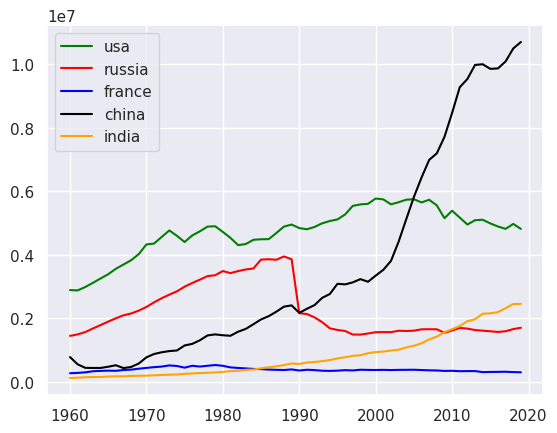

In [146]:
usa = co2_countries[co2_countries['country']=='United States']
russia = co2_countries[co2_countries['country']=='Russian Federation']
france = co2_countries[co2_countries['country']=='France']
china = co2_countries[co2_countries['country']=='China']
india = co2_countries[co2_countries['country']== 'India']
plt.plot(usa.groupby('year')['value'].sum().reset_index().set_index('year'),color = 'green',label = 'usa')
plt.plot(russia.groupby('year')['value'].sum().reset_index().set_index('year'),color = 'red',label = 'russia')
plt.plot(france.groupby('year')['value'].sum().reset_index().set_index('year'),color = 'blue',label = 'france')
plt.plot(china.groupby('year')['value'].sum().reset_index().set_index('year'),color = 'black',label = 'china')
plt.plot(india.groupby('year')['value'].sum().reset_index().set_index('year'),color = 'orange',label = 'india')
plt.legend(loc = 'best')

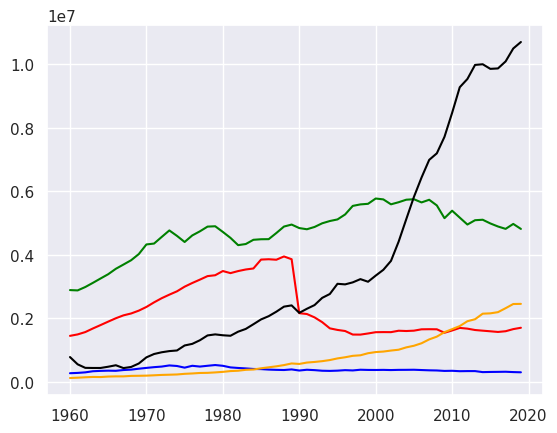

In [147]:
usa = co2_countries[co2_countries['country']=='United States']
russia = co2_countries[co2_countries['country']=='Russian Federation']
france = co2_countries[co2_countries['country']=='France']
china = co2_countries[co2_countries['country']=='China']
india = co2_countries[co2_countries['country']== 'India']
plt.plot(usa.groupby('year')['value'].sum().reset_index().set_index('year'),color = 'green',label = 'usa')
plt.plot(russia.groupby('year')['value'].sum().reset_index().set_index('year'),color = 'red',label = 'russia')
plt.plot(france.groupby('year')['value'].sum().reset_index().set_index('year'),color = 'blue',label = 'france')
plt.plot(china.groupby('year')['value'].sum().reset_index().set_index('year'),color = 'black',label = 'china')
plt.plot(india.groupby('year')['value'].sum().reset_index().set_index('year'),color = 'orange',label = 'india')

In [148]:
co2_countries.to_csv('co2_countries.csv')

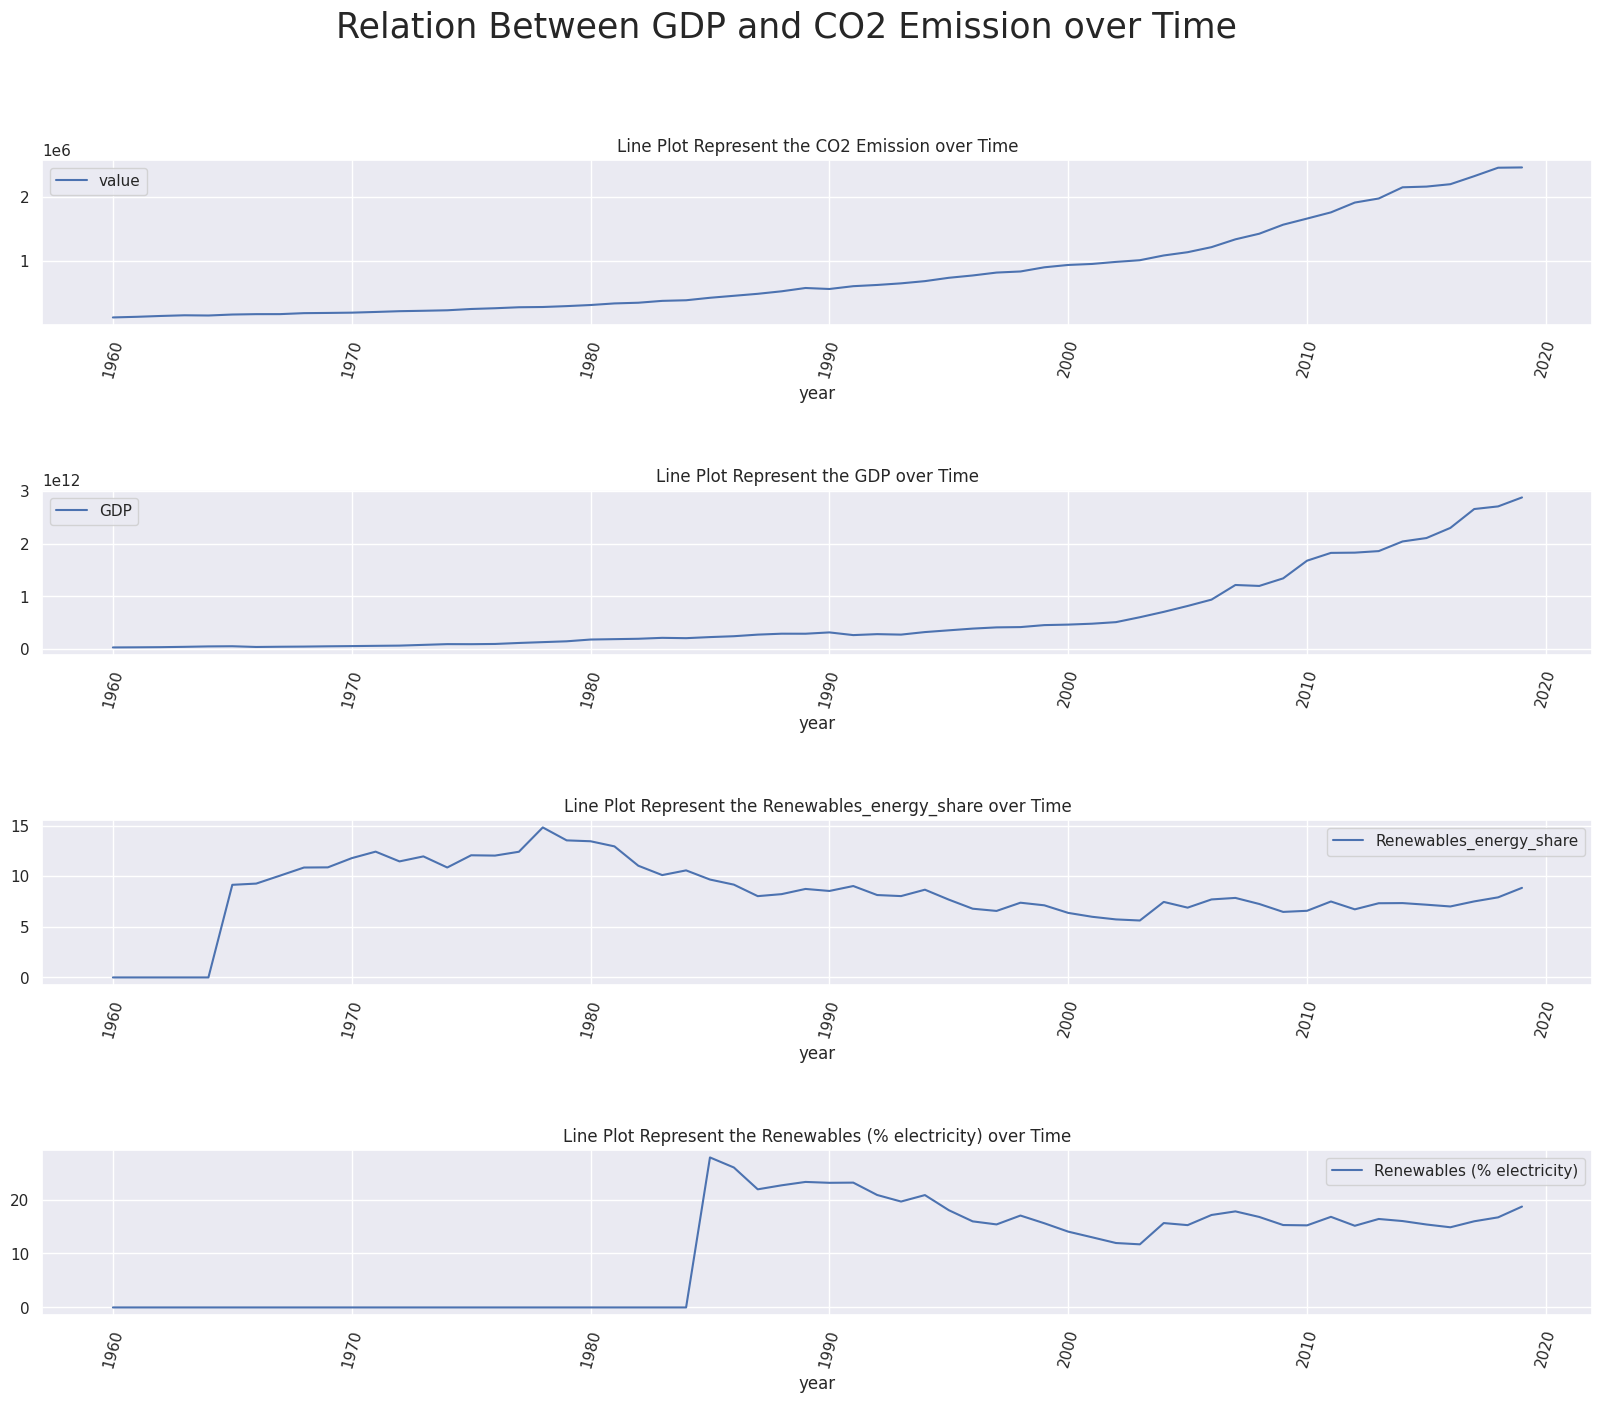

In [149]:
country = data[data['country'] == 'India']
figure, ax = plt.subplots(4,1,figsize = (20,15))
plt.subplots_adjust(hspace=1)
sns.lineplot(country.groupby('year')['value'].sum().reset_index().set_index('year'),ax = ax[0])
ax[0].tick_params('x', labelrotation=75)
sns.lineplot(country.groupby('year')['GDP'].sum().reset_index().set_index('year'),ax = ax[1])
ax[1].tick_params('x', labelrotation=75)
sns.lineplot(country.groupby('year')['Renewables_energy_share'].sum().reset_index().set_index('year'),ax = ax[2])
ax[2].tick_params('x', labelrotation=75)
sns.lineplot(country.groupby('year')['Renewables (% electricity)'].sum().reset_index().set_index('year'),ax = ax[3])
ax[3].tick_params('x', labelrotation=75)
figure.suptitle('Relation Between GDP and CO2 Emission over Time ', fontsize=25)
ax[0].title.set_text('Line Plot Represent the CO2 Emission over Time')
ax[1].title.set_text('Line Plot Represent the GDP over Time')
ax[2].title.set_text('Line Plot Represent the Renewables_energy_share over Time')
ax[3].title.set_text('Line Plot Represent the Renewables (% electricity) over Time')
plt.show()

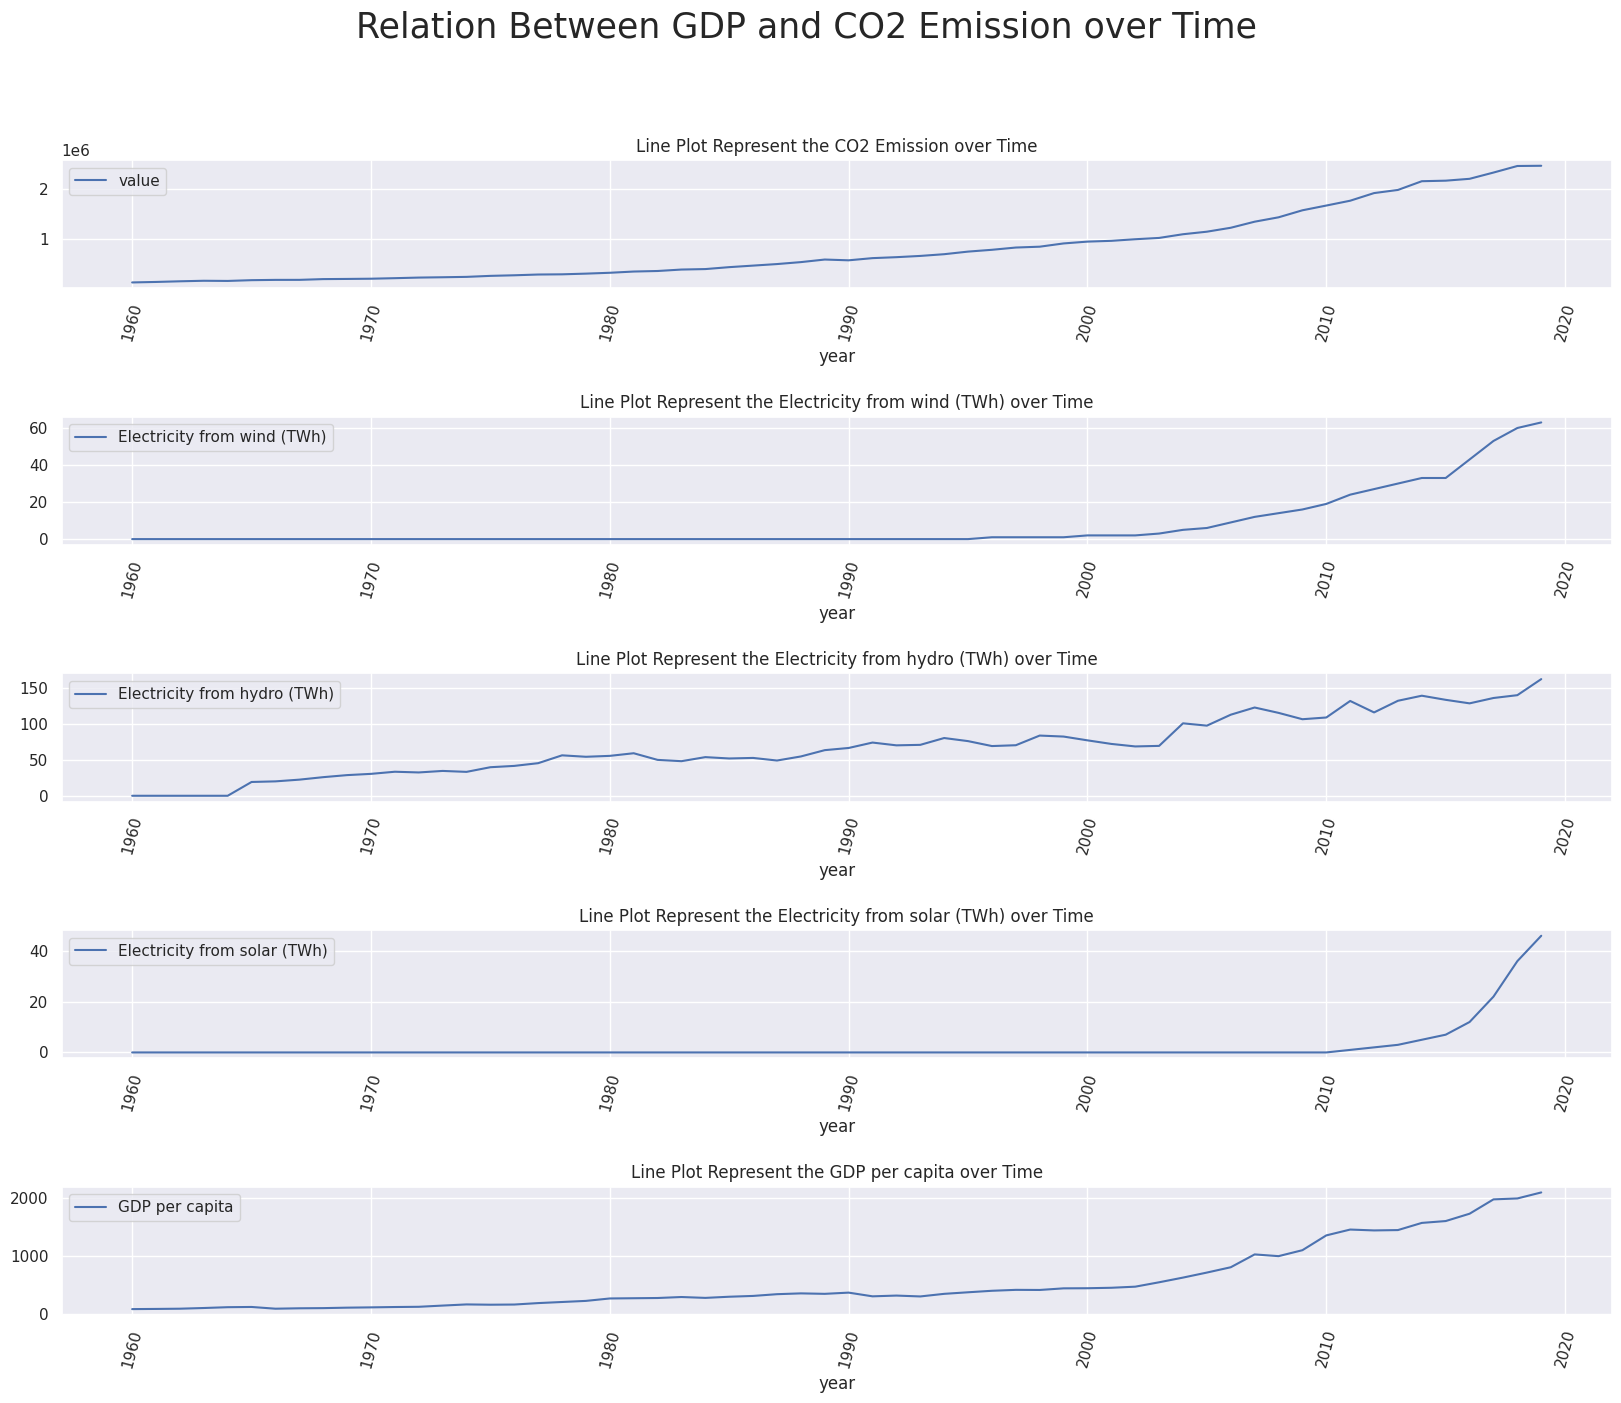

In [151]:
country = data[data['country'] == 'India']
figure, ax = plt.subplots(5,1,figsize = (20,15))
plt.subplots_adjust(hspace=1)
sns.lineplot(country.groupby('year')['value'].sum().reset_index().set_index('year'),ax = ax[0])
ax[0].tick_params('x', labelrotation=75)
sns.lineplot(country.groupby('year')['Electricity from wind (TWh)'].sum().reset_index().set_index('year'),ax = ax[1])
ax[1].tick_params('x', labelrotation=75)
sns.lineplot(country.groupby('year')['Electricity from hydro (TWh)'].sum().reset_index().set_index('year'),ax = ax[2])
ax[2].tick_params('x', labelrotation=75)
sns.lineplot(country.groupby('year')['Electricity from solar (TWh)'].sum().reset_index().set_index('year'),ax = ax[3])
ax[3].tick_params('x', labelrotation=75)
sns.lineplot(country.groupby('year')['GDP per capita'].sum().reset_index().set_index('year'),ax = ax[4])
ax[4].tick_params('x', labelrotation=75)
figure.suptitle('Relation Between GDP and CO2 Emission over Time ', fontsize=25)
ax[0].title.set_text('Line Plot Represent the CO2 Emission over Time')
ax[1].title.set_text('Line Plot Represent the Electricity from wind (TWh) over Time')
ax[2].title.set_text('Line Plot Represent the Electricity from hydro (TWh) over Time')
ax[3].title.set_text('Line Plot Represent the Electricity from solar (TWh) over Time')
ax[4].title.set_text('Line Plot Represent the GDP per capita over Time')
plt.show()

<Axes: xlabel='country_name', ylabel='value'>

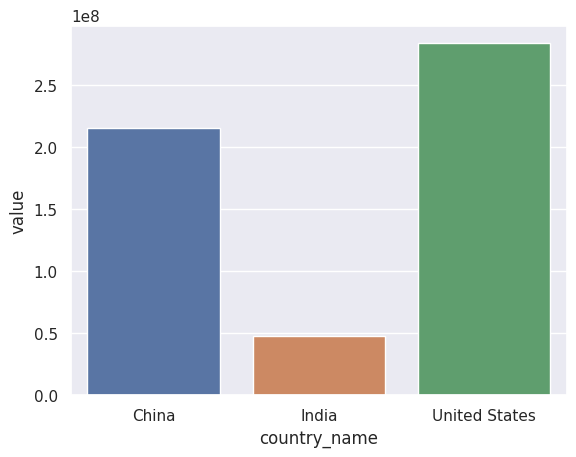

In [154]:
data = co2.groupby('country_name')['value'].sum().reset_index()
sns.barplot(data= data[data['country_name'].isin(['United States', 'China', 'Russhaveederation','India'])],x= 'country_name',y='value')

In [155]:
import plotly.express as px
fig = px.choropleth(co2, locations='country_code',
                    animation_frame='year', animation_group='country_name',
                    color='value', 
                    hover_name='country_name',
                    hover_data=['year', 'country_name', 'value'],
                    color_continuous_scale=px.colors.sequential.dense)
fig.show()

In [156]:
co2_country = co2_countries.groupby('country')['value'].sum().reset_index()
top_10 = co2_countries.groupby('country')['value'].sum().reset_index().sort_values('value',ascending = False).head(10)
top_10_name = top_10['country'].tolist()
top_10_emmiters= co2_countries.query("country in @top_10_name").copy()
top_10_emmiters

,Unnamed: 0,year,country,value,GDP per capita,Renewables_energy_share,Electricity from wind (TWh),Electricity from hydro (TWh),Electricity from solar (TWh),Other renewables including bioenergy (TWh),Renewables (% electricity),GDP
305,305,1985,Canada,4.220790e+05,14114.0,31.611633,0.0,303.64500,0.0,2.0,66.516800,3.647560e+11
306,306,1986,Canada,4.050532e+05,14461.0,32.045930,0.0,310.63500,0.0,2.0,66.690490,3.774380e+11
307,307,1987,Canada,4.313492e+05,16308.0,31.649542,0.0,316.20600,0.0,2.0,64.166090,4.313170e+11
308,308,1988,Canada,4.560538e+05,18936.0,29.611338,0.0,307.43500,0.0,2.0,61.247300,5.073540e+11
309,309,1989,Canada,4.632741e+05,20715.0,27.817396,0.0,290.44974,0.0,3.0,59.010662,5.650560e+11
...,...,...,...,...,...,...,...,...,...,...,...,...
13649,13649,2013,United States,5.092100e+06,53106.0,7.134616,168.0,263.88000,9.0,80.0,12.831115,1.678480e+13
13650,13650,2015,United States,4.990710e+06,56863.0,7.468743,191.0,243.99000,39.0,83.0,13.626135,1.823830e+13
13651,13651,2016,United States,4.894500e+06,58021.0,8.285086,227.0,261.13000,55.0,82.0,15.288093,1.874510e+13
13652,13652,2018,United States,4.975310e+06,63064.0,8.964939,273.0,286.62000,93.0,81.0,17.449990,2.061190e+13


In [157]:
px.area(top_10_emmiters, x='year', y='value', line_group='country', color='country',
                   category_orders={
                    "country": top_10_name 
            },
                labels={
                     "value": "CO2 Emissions",
                     "year": "Year",
                     "country": "Country"
                 },
              title = 'Annual CO2 Emissions, by Country',
       template="simple_white")

#ARIMA Model

In [158]:
data = co2_countries.groupby('year')['value'].sum()
data.head()

year
1960    1.120420e+07
1961    1.116037e+07
1962    1.154369e+07
1963    1.214443e+07
1964    1.278324e+07
Name: value, dtype: float64

In [160]:
co2_yoy = data.reset_index().set_index('year')

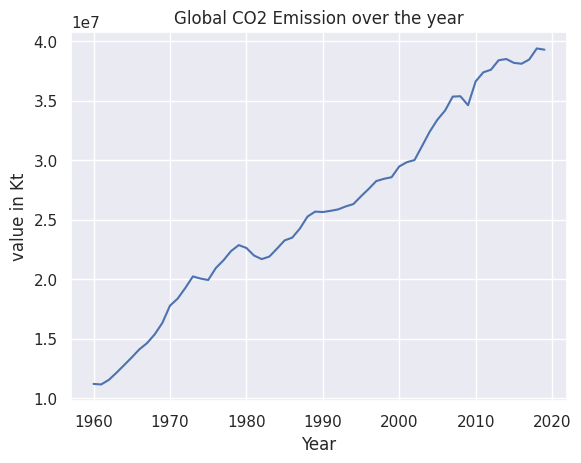

In [161]:
plt.title('Global CO2 Emission over the year')
plt.xlabel('Year')
plt.ylabel('value in Kt')
plt.plot(co2_yoy)

#Determine the rolling statistics

In [162]:

rolling_mean_co2_yoy = co2_yoy.rolling(window=2).mean()
rolling_std_co2_yoy = co2_yoy.rolling(window=2).std()

<Axes: xlabel='year'>

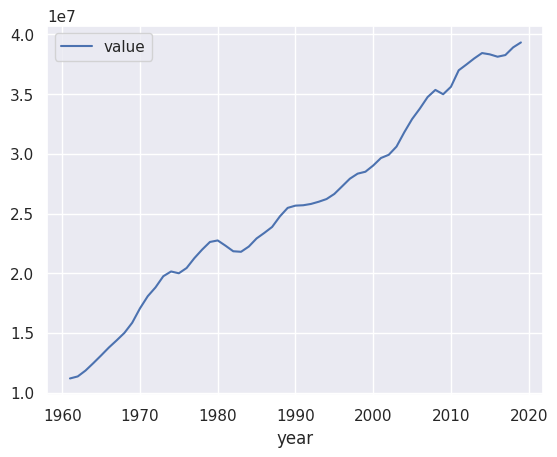

In [163]:
rolling_mean_co2_yoy.plot()

<Axes: xlabel='year'>

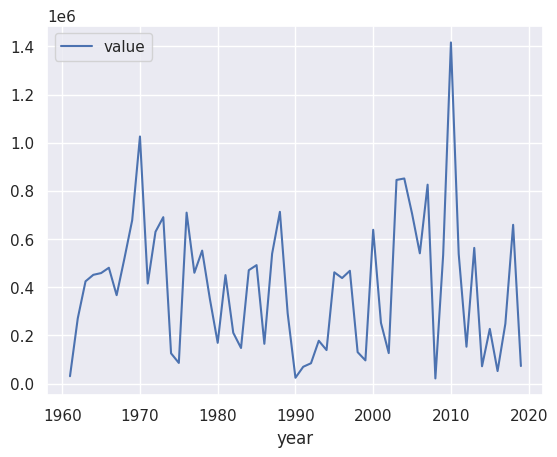

In [164]:
rolling_std_co2_yoy.plot()

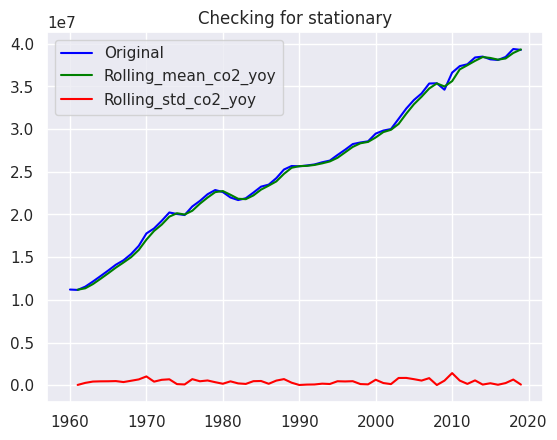

In [165]:
original = plt.plot(co2_yoy, color = 'blue', label = 'Original')
rolling_mean_plot = plt.plot(rolling_mean_co2_yoy, color = 'green', label = 'Rolling_mean_co2_yoy')
rolling_std_plot = plt.plot(rolling_std_co2_yoy, color = 'red', label = 'Rolling_std_co2_yoy')
plt.title('Checking for stationary')
plt.legend(loc = 'best')

#The trend

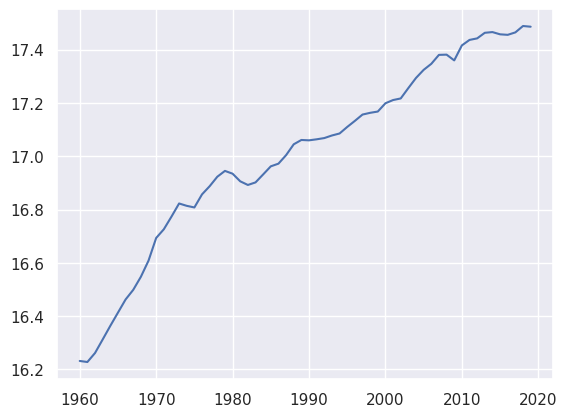

In [166]:
co2_yoy_log = np.log(co2_yoy)
plt.plot(co2_yoy_log)

#Dtermine the rolling statistics for log form

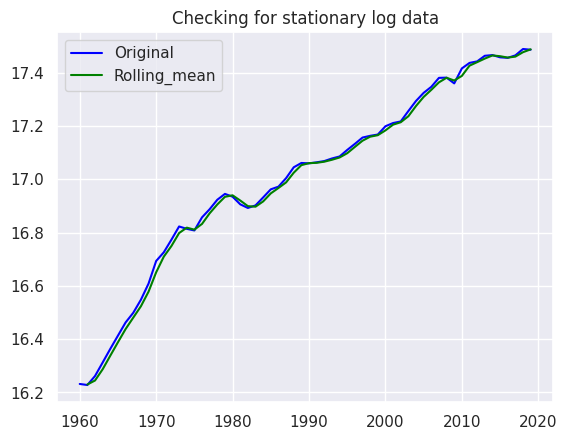

In [167]:
rolling_mean_co2_yoy_log = co2_yoy_log.rolling(window=2).mean()
rolling_std_co2_yoy_log = co2_yoy_log.rolling(window=2).std()
original = plt.plot(co2_yoy_log, color = 'blue', label = 'Original')
rolling_mean_plot_log = plt.plot(rolling_mean_co2_yoy_log, color = 'green', label = 'Rolling_mean')
#rolling_std_plot_log = plt.plot(rolling_std_log, color = 'red', label = 'Rolling_std')
plt.title('Checking for stationary log data')
plt.legend(loc = 'best')

<Axes: xlabel='year'>

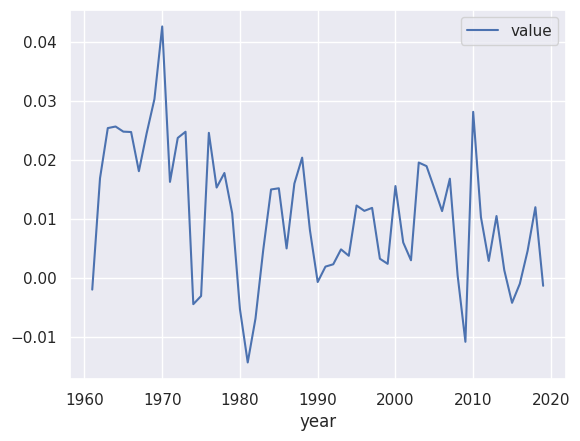

In [168]:

co2_yoy_log_moving_average = co2_yoy_log - rolling_mean_co2_yoy_log
co2_yoy_log_moving_average = co2_yoy_log_moving_average.dropna()
co2_yoy_log_moving_average.plot()

In [169]:
from statsmodels.tsa.stattools import adfuller
def Stationary_Test(data):
    data = data.groupby('year')['value'].sum().reset_index().set_index('year')
    Moving_Average = data.rolling(window=2).mean()
    Moving_STD = data.rolling(window=2).std()
    original = plt.plot(data, color = 'blue', label = 'Original')
    Moving_Average_Plot = plt.plot(Moving_Average, color = 'green', label = 'Rolling_mean')
    Moving_STD_plot = plt.plot(Moving_STD, color = 'red', label = 'Rolling_std')
    plt.title('Checking for stationary log data')
    plt.legend(loc = 'best')
    from statsmodels.tsa.stattools import adfuller
    test = adfuller(data['value'], autolag= 'AIC')
    OUTPUT = pd.Series(test[0:4], index = ['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
        OUTPUT['Critical Value (%s)'%key] = value
    print(OUTPUT)

Test Statistic                 -2.997976
p-value                         0.035084
#Lags Used                      3.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


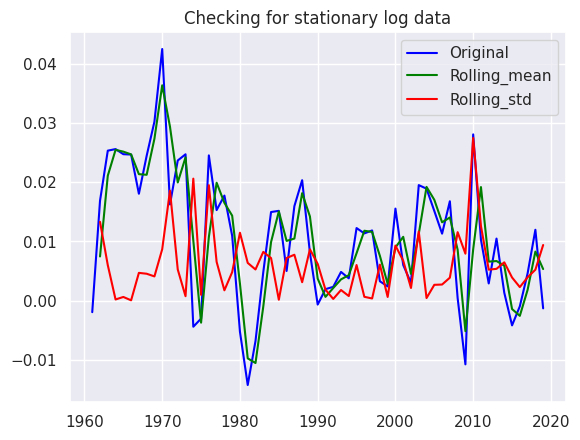

In [170]:
Stationary_Test(co2_yoy_log_moving_average)

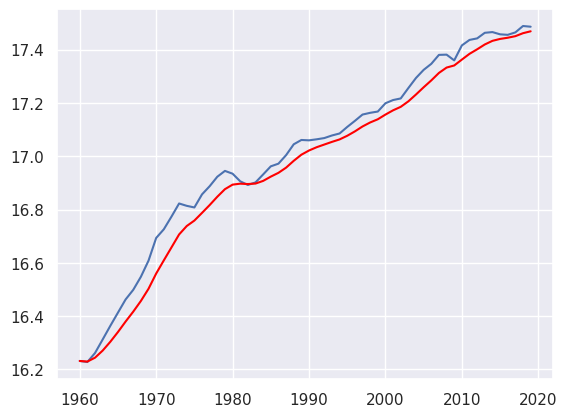

In [171]:
weighted_average = co2_yoy_log.ewm(halflife=2,min_periods=0,adjust=True).mean()
plt.plot(co2_yoy_log)
plt.plot(weighted_average,color = 'red')

Test Statistic                 -1.780291
p-value                         0.390289
#Lags Used                      4.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


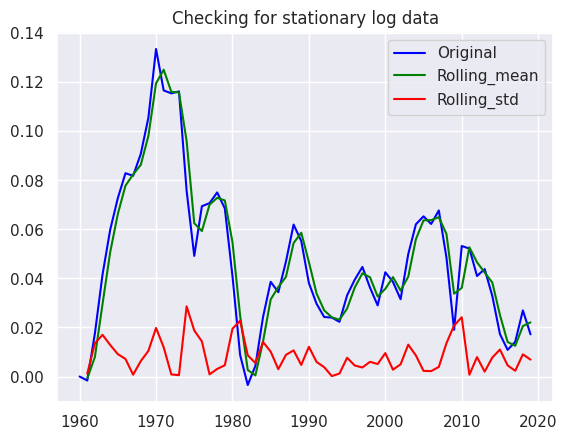

In [173]:
co2_yoy_log_minus_weighted_average = co2_yoy_log-weighted_average
Stationary_Test(co2_yoy_log_minus_weighted_average)

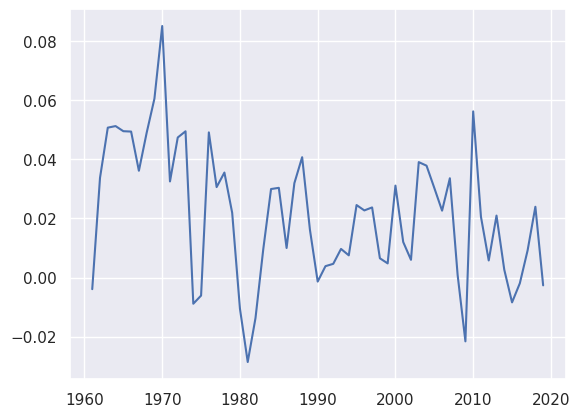

In [174]:

datasetlogdiffshifting = co2_yoy_log - co2_yoy_log.shift()
plt.plot(datasetlogdiffshifting)

Test Statistic                 -2.997976
p-value                         0.035084
#Lags Used                      3.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


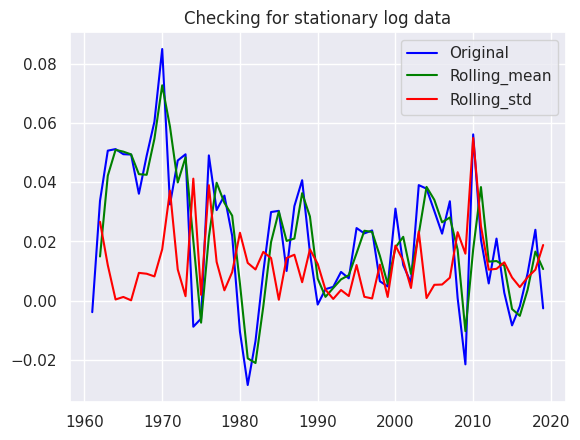

In [175]:
co2_yoy_log_logdiffshifting = datasetlogdiffshifting.dropna()
Stationary_Test(co2_yoy_log_logdiffshifting)

In [176]:
from statsmodels.tsa.stattools import acf, pacf
def autocorrelation(data):
    data = data.groupby('year')['value'].sum().reset_index().set_index('year')
    lag_acf = acf(data, nlags=25)
    lag_pacf = pacf(data, nlags=25, method='ols')
    # Plot ACF
    plt.subplot(121)
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle = '--',color = 'red')
    plt.axhline(y = -1.96/np.sqrt(len(data)),linestyle = '--', color = 'gray')
    plt.axhline(y = 1.96/np.sqrt(len(data)),linestyle = '--', color = 'gray')
    plt.title('Autocorrelation Function')
    # Plot PACF
    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle = '--',color = 'red')
    plt.axhline(y = -1.96/np.sqrt(len(data)),linestyle = '--', color = 'gray')
    plt.axhline(y = 1.96/np.sqrt(len(data)),linestyle = '--', color = 'gray')
    plt.title('Partial Autocorrelation Function')

In [177]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

#ARIMA Model

In [178]:
from statsmodels.tsa.arima.model import ARIMA
def arima_model(data, p, d, q):
    x = data['value'].values
    size = int(len(x)*0.9)
    train = x[0:size]
    test = x[size:len(x)]
    training_data = [x for x in train]
    model_prediction=[]
    
    for x in range(len(test)):
        model = ARIMA(training_data, order=(p, d, q))
        fitted_model = model.fit()
        yhat = fitted_model.forecast()
        model_prediction.append(yhat[0])
        observetion = test[x]
        training_data.append(observetion)
        print(f'predicted={yhat[0]}, expected={observetion}')
    
    rmse = sqrt(mean_squared_error(test, model_prediction))
    print(f'\nThe RMSE for this ARIMA model is {rmse}')
    print()
    
    print(fitted_model.summary())
    
    residuals = pd.DataFrame(fitted_model.resid)
    residuals.plot()
    plt.show()
    
    residuals.plot(kind='kde')
    plt.show()


In [179]:
def forecast(data, p, d, q, t):
    value = data['value'].values
    year  = data['year'].values
    historIcal_value = value.tolist()
    period = year.tolist()
    forcasted_values = []
    forcasted_period = []
    for x in range(t):
        forcasted_period.append(2020+x)
        model = ARIMA(historIcal_value, order=(p, d, q))
        fitted_model = model.fit()
        yhat = fitted_model.forecast()
        forcasted_values.append(yhat[0])
        historIcal_value.append(yhat[0])
        plt.figure(figsize=(10, 5))
    plt.plot(period, value, label='CO2 Emission upto 2019')
    plt.plot(forcasted_period, forcasted_values, label='CO2 Emission forcasted 2019')
    plt.legend()
    plt.show()

In [180]:
data = co2.loc[co2['country_name']=='China']

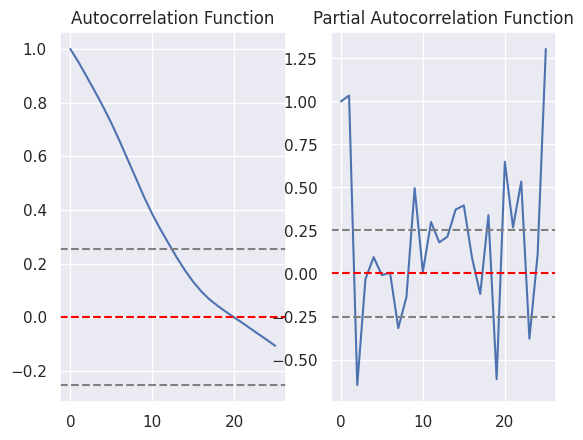

In [181]:
autocorrelation(data)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



predicted=10287921.417506315, expected=10006669.921875
predicted=10267362.128815057, expected=9861099.609375
predicted=9998277.38955282, expected=9874660.15625
predicted=10035480.779921155, expected=10096009.765625
predicted=10117873.45370173, expected=10502929.6875
predicted=10843614.878771784, expected=10707219.7265625

The RMSE for this ARIMA model is 267696.519000377

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   59
Model:                ARIMA(10, 1, 1)   Log Likelihood                -787.106
Date:                Tue, 16 May 2023   AIC                           1598.211
Time:                        07:30:35   BIC                           1622.937
Sample:                             0   HQIC                          1607.842
                                 - 59                                         
Covariance Type:                  opg                                   

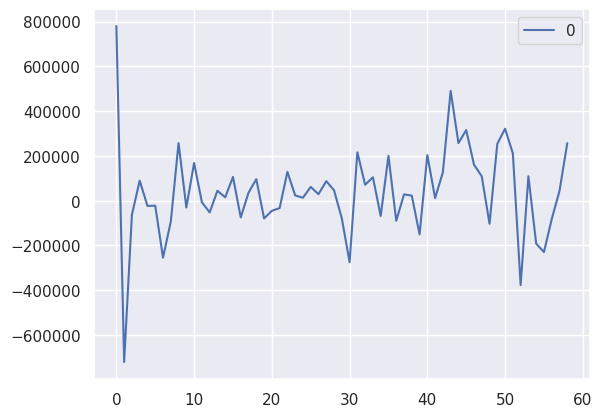

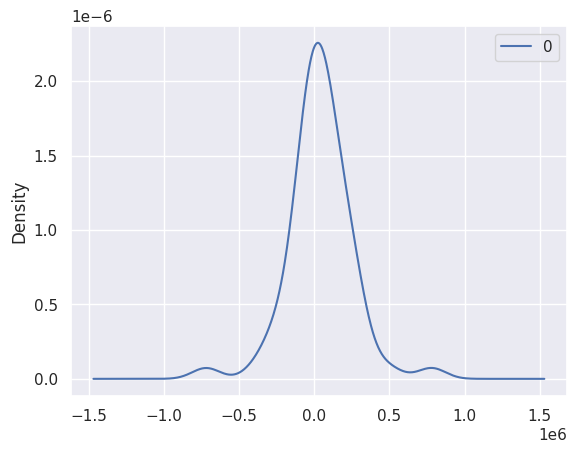

In [116]:
arima_model(data, 10, 1, 1)

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

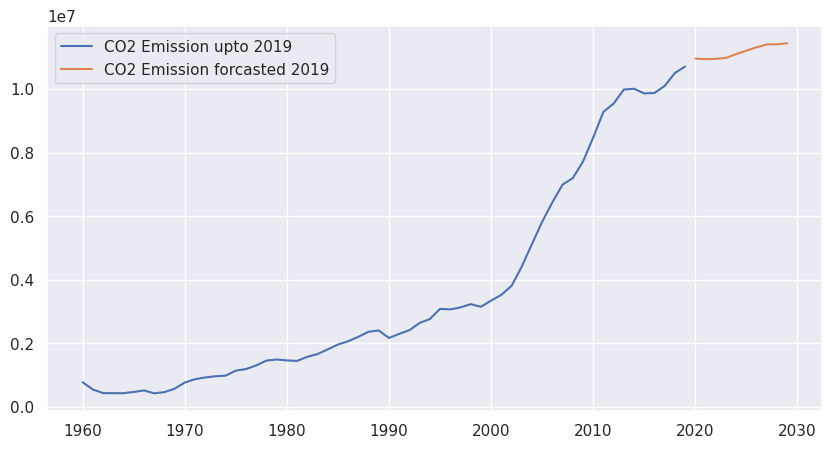

In [117]:
forecast(data, 10, 1, 1, 10)

In [118]:
data = co2.loc[co2['country_name']=='India']

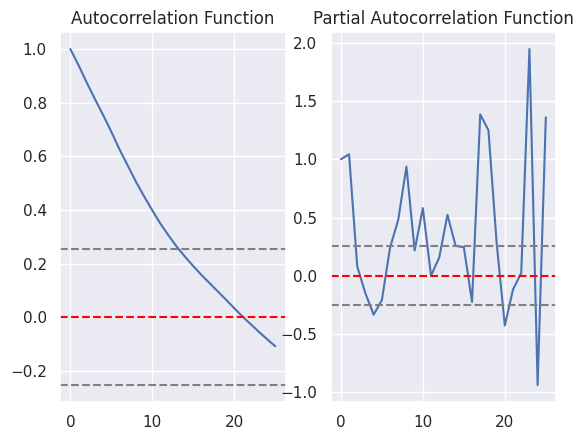

In [120]:
autocorrelation(data)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



predicted=2076291.9639433145, expected=2147110.10742188
predicted=2252723.374271316, expected=2158020.01953125
predicted=2293128.053872411, expected=2195250.0
predicted=2241462.0894966214, expected=2320409.91210938
predicted=2317858.3752549742, expected=2451929.93164063
predicted=2570149.020220876, expected=2456300.04882813

The RMSE for this ARIMA model is 100609.45738247651

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   59
Model:                ARIMA(10, 1, 1)   Log Likelihood                -680.440
Date:                Tue, 16 May 2023   AIC                           1384.881
Time:                        07:32:21   BIC                           1409.606
Sample:                             0   HQIC                          1394.512
                                 - 59                                         
Covariance Type:                  opg                              

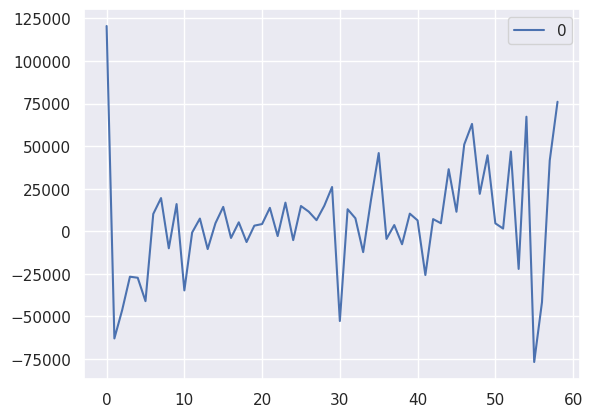

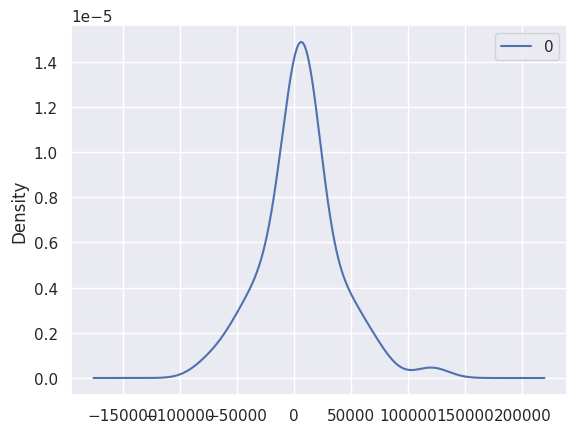

In [121]:

arima_model(data, 10, 1, 1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

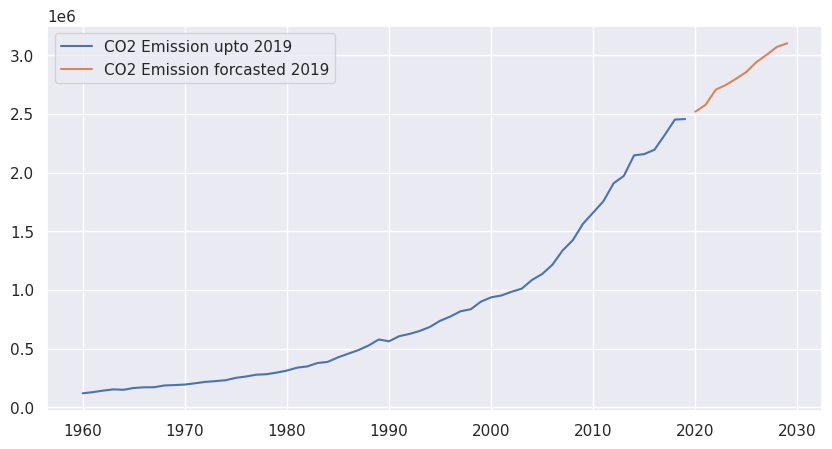

In [122]:
forecast(data, 10, 1, 1, 10)

In [123]:
data = co2.loc[co2['country_name']=='Russian Federation']

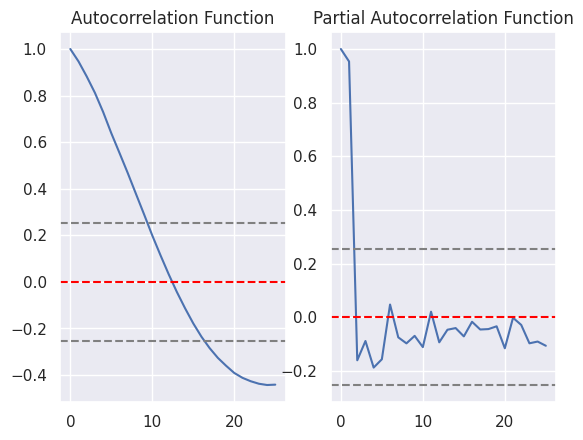

In [124]:
autocorrelation(data)

predicted=1646215.0366044384, expected=1611959.9609375
predicted=1610442.1865549204, expected=1592560.05859375
predicted=1583749.9459560798, expected=1571520.01953125
predicted=1564898.3163841467, expected=1594550.04882813
predicted=1592118.922508018, expected=1661000.0
predicted=1662054.3923232963, expected=1703589.96582031

The RMSE for this ARIMA model is 38712.15086773124

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   59
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -799.390
Date:                Tue, 16 May 2023   AIC                           1614.780
Time:                        07:33:21   BIC                           1631.263
Sample:                             0   HQIC                          1621.200
                                 - 59                                         
Covariance Type:                  opg                              

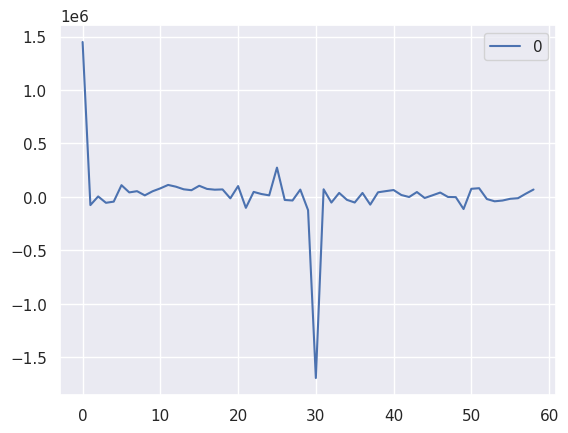

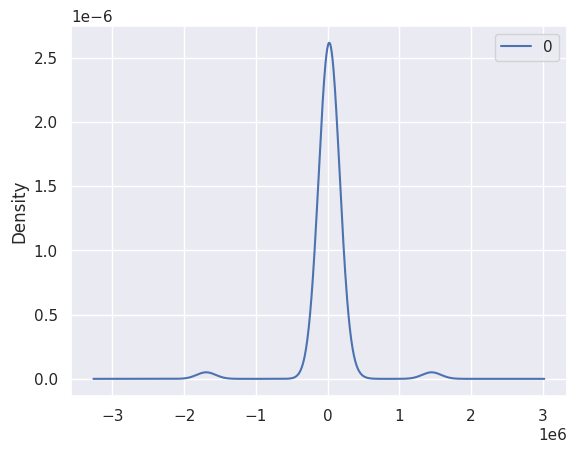

In [125]:

arima_model(data, 5, 1, 2)

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

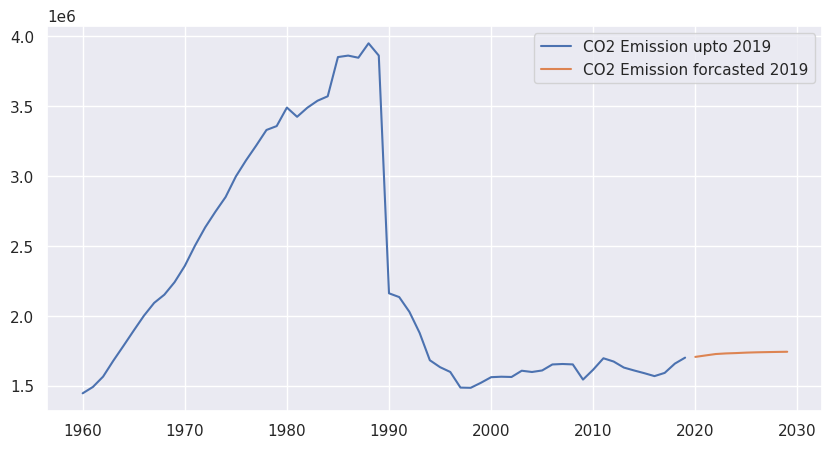

In [126]:
forecast(data, 5, 1, 2, 10)